In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pyarrow.feather

In [2]:
df_training = pd.read_csv("cs-training.csv", index_col=0)
df_training

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
df_training.isna().sum(axis=0)

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
df_training["MonthlyIncome"] = df_training["MonthlyIncome"].fillna(value = df_training["MonthlyIncome"].mean())
df_training["NumberOfDependents"] = df_training["NumberOfDependents"].fillna(value = df_training["NumberOfDependents"].mean())
df_training.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# 1.PCA

In [5]:
from sklearn.model_selection import train_test_split

X, y = df_training.iloc[:, 1:].values, df_training.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() #特征缩放
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[2.99682098 1.54111863 1.2299299  1.00144589 1.01181228 0.92513941
 0.5426912  0.72807749 0.01652764 0.00653182]


## Total and explained variance

In [8]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

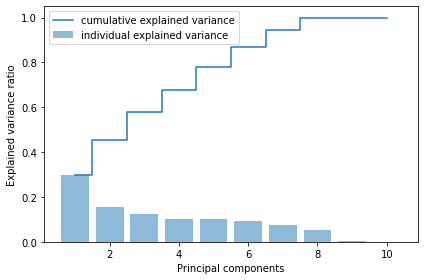

In [9]:
plt.bar(range(1, 11), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 11), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

## Feature transformation

In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Note: I added the `key=lambda k: k[0]` in the sort call above
# just like I used it further below in the LDA section.
# This is to avoid problems if there are ties in the eigenvalue
# arrays (i.e., the sorting algorithm will only regard the
# first element of the tuples, now).

In [11]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis]))

In [12]:
X_train_pca = X_train_std.dot(w)
X_train_pca

array([[-0.14603246,  0.23582533, -0.90255945],
       [-0.11265396,  1.00255096, -1.65798306],
       [-0.21200451, -2.21214336,  1.53298823],
       ...,
       [-0.13007075, -0.65343651, -1.14262254],
       [-0.19232077,  0.31618841, -1.55448274],
       [ 0.18121272,  0.02178696,  0.11591871]])

## Principal component analysis in scikit-learn

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.29967924, 0.15411039, 0.12299182, 0.10118026, 0.10014363,
       0.09251306, 0.07280706, 0.0542686 , 0.00165275, 0.00065318])

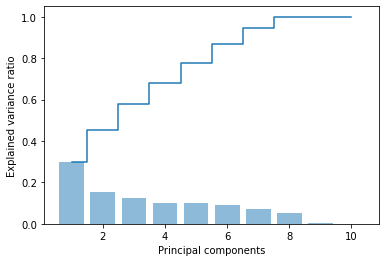

In [14]:
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [15]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [16]:
X_train_pca

array([[-0.14603246, -0.23582533, -0.90255945],
       [-0.11265396, -1.00255096, -1.65798306],
       [-0.21200451,  2.21214336,  1.53298823],
       ...,
       [-0.13007075,  0.65343651, -1.14262254],
       [-0.19232077, -0.31618841, -1.55448274],
       [ 0.18121272, -0.02178696,  0.11591871]])

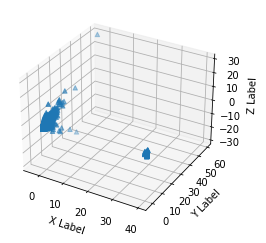

In [17]:
#画个简单三维图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure().add_subplot(111, projection = '3d')
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1],X_train_pca[:, 2],marker = '^') 
#设置坐标轴
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#显示图像
plt.show()

# 2.1 Logistic Regression with L1 penalty

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')   

In [19]:
from sklearn.linear_model import LogisticRegression

#record the number of coef
coef_number = []

#record the estimation results of coef
coef_result = {}
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, penalty = "l1",random_state=1,solver = "liblinear", multi_class='ovr')
    lr.fit(X_train_pca, y_train)
    feature_num = sum(sum(lr.coef_ !=0))
    coef_number.append([10.**c,feature_num])
    coef_result[10.**c] = lr.coef_

In [20]:
coef_number

[[1e-05, 0],
 [0.0001, 0],
 [0.001, 2],
 [0.01, 3],
 [0.1, 3],
 [1.0, 3],
 [10.0, 3],
 [100.0, 3],
 [1000.0, 3],
 [10000.0, 3]]

In [21]:
coef_result[0.001]

array([[0.08032414, 0.        , 0.18701476]])

In [22]:
X_train_pca_selected = X_train_pca[:,[0,2]]
X_test_pca_selected = X_test_pca[:,[0,2]]

In [23]:
lr = LogisticRegression(C=1.0, penalty = "l1",random_state=1,solver = "liblinear", multi_class='ovr')
lr.fit(X_train_pca_selected, y_train)

LogisticRegression(multi_class='ovr', penalty='l1', random_state=1,
                   solver='liblinear')

C:\Users\29128\AppData\Local\Temp\ipykernel_60448\3603768161.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


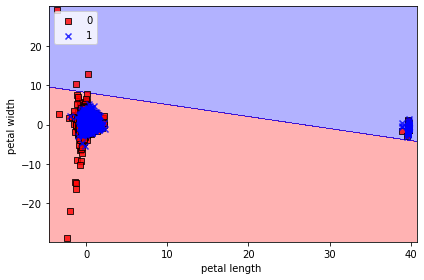

In [24]:
plot_decision_regions(X_train_pca_selected, y_train,
                      classifier=lr) # test_idx=range(105, 150)
plt.xlabel('petal length ')
plt.ylabel('petal width ')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [25]:
print('Test Accuracy: %.3f' % lr.score(X_test_pca_selected, y_test))
y_pred = lr.predict(X_test_pca_selected)
y_pred

Test Accuracy: 0.933


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# 2.2 Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
depth = [3,4,5,6,7,8]
acc_set = []
para_set  = []
for i in depth:
    tree_model = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=1)
    tree_model.fit(X_train_pca_selected, y_train)
    y_predict = tree_model.predict(X_train_pca_selected)
    acc = accuracy_score(y_train, y_predict)
    acc_set.append(acc)
    para_set.append(i)

In [27]:
#check the accuracy under different parameters 
print(acc_set)
print(para_set)

[0.9360571428571428, 0.9365142857142857, 0.9369904761904762, 0.9372952380952381, 0.9376857142857142, 0.9384285714285714]
[3, 4, 5, 6, 7, 8]


C:\Users\29128\AppData\Local\Temp\ipykernel_60448\3603768161.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


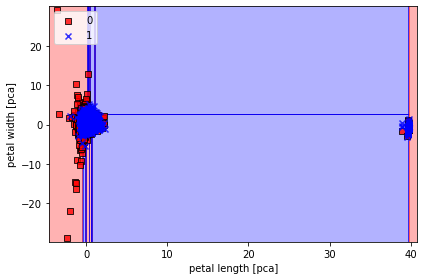

In [28]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)
tree_model.fit(X_train_pca_selected, y_train)

plot_decision_regions(X_train_pca_selected, y_train,
                      classifier=tree_model) # test_idx=range(105, 150)
plt.xlabel('petal length [pca]')
plt.ylabel('petal width [pca]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# 2.3 Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [20,30,40,50,100]
acc_set = []
para_set  = []
for i in n_estimators:
    forest = RandomForestClassifier(criterion='gini',
                                n_estimators=i, 
                                random_state=1,
                                n_jobs=2)
    forest.fit(X_train_pca_selected, y_train)
    y_predict = forest.predict(X_train_pca_selected)
    acc = accuracy_score(y_train, y_predict)
    acc_set.append(acc)
    para_set.append(i)

In [30]:
#check the accuracy under different parameters 
print(acc_set)
print(para_set)

[0.9947238095238096, 0.9970571428571429, 0.9981619047619048, 0.998552380952381, 0.9996285714285714]
[20, 30, 40, 50, 100]


C:\Users\29128\AppData\Local\Temp\ipykernel_60448\3603768161.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


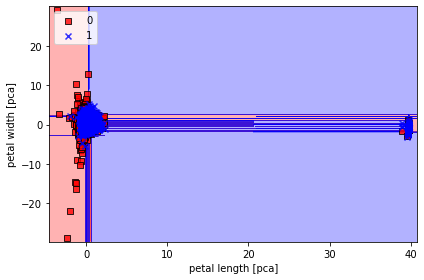

In [31]:
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=30 , 
                                random_state=1 ,
                                n_jobs=2)
forest.fit(X_train_pca_selected, y_train)

plot_decision_regions(X_train_pca_selected, y_train,
                      classifier=forest) # test_idx=range(105, 150)
plt.xlabel('petal length [pca]')
plt.ylabel('petal width [pca]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# 3. Pipeline

In [32]:
from sklearn.model_selection import train_test_split

X, y = df_training.iloc[:, 1:].values, df_training.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=3)),
                    ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.933


# 4. K-fold cross-validation

In [34]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
    


kfold = StratifiedKFold(n_splits=5).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [78407  5593], Acc: 0.933
Fold: 2, Class dist.: [78407  5593], Acc: 0.933
Fold: 3, Class dist.: [78407  5593], Acc: 0.934
Fold: 4, Class dist.: [78407  5593], Acc: 0.933
Fold: 5, Class dist.: [78408  5592], Acc: 0.934

CV accuracy: 0.934 +/- 0.000


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93347619 0.93328571 0.9342381  0.933      0.93352381]
CV accuracy: 0.934 +/- 0.000


# 5. Grid Search

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.936 +/- 0.000
